# Comparison of Previous Critical Point Estimates

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi as π
import pandas as pd
from dgutils import colors as colortools

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# plot style
plt.style.reload_library()
plt.style.use('../include/aps.mplstyle')
figsize = plt.rcParams['figure.figsize']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [40]:
cols = {
 "Purple":"#B39EB5",  
 "Lavender":"#C4C3E9",
 "Teal":"#AEC6CF", 
 "Cyan":"#89CFF0",
 "Sky Blue":"#80B7DE",
 "Blue":"#779ECB", 
 "Red":"#FF6961", 
 "Coral":"#FF9AA2",
 "Sandy Brown":"#F4A460",
 "Orange":"#FFB347",
 "Brown":"#D1A677",
 "Taupe":"#D3B3A6",
  "Green":"#77DD77",
 "Magenta":"#CFCFC4",
 "Olive":"#B2B982",
 "Orchid":"#DA70D6",
 "Light Pink":"#FFB6C1",
 "Black":"#000000"}

cols_list = list(cols.values())

markers = ['o','s','d','p','h','o','^','>','v','<','D','P',"*"]

## Read in data from a `.csv` file and plot the previous predictions for $(J/U)_c$

In [41]:
df = pd.read_csv("../data/bh_critical.csv")

# Extract specific columns as NumPy arrays
year = df['Year'].to_numpy().astype(int)
JoUc = df['Estimate'].to_numpy().astype(float)
ΔJoUc = df['Error'].to_numpy().astype(float)
label = df['Reference'].tolist()

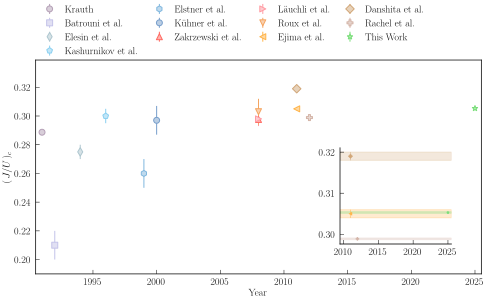

In [76]:
from matplotlib.ticker import MultipleLocator
plt.style.reload_library()
with plt.style.context('../include/aps.mplstyle'):
    
    fig, ax = plt.subplots(1,1,figsize=(2*figsize[0],2*figsize[1]),sharex=True, sharey=False, squeeze=True,constrained_layout=True)
    for i,cy in enumerate(year):

        ax.errorbar(cy,JoUc[i],yerr=ΔJoUc[i], marker=markers[i], mec=cols_list[i], ecolor=cols_list[i], linestyle='None',
                    mfc=colortools.get_alpha_hex(cols_list[i],0.5),elinewidth=1,barsabove=False, label=label[i], markersize=6)
    ax.set_ylim(0.19,0.339)
    ax.set_xlim(1990.5,2025.5)
    ax.set_xlabel('Year')
    ax.set_ylabel(r'$(\, J/U\, )_c$')

    # Inset showing the data for years after 2010
    in_ax = inset_axes(ax, width="25%", height="45%", loc='lower right', borderpad=3)
    for i,cy in enumerate(year):
        if cy > 2010:
            in_ax.errorbar(cy,JoUc[i],yerr=ΔJoUc[i], marker=markers[i], mec=cols_list[i], ecolor=cols_list[i], linestyle='None',
                    mfc=cols_list[i],elinewidth=0.5,barsabove=False, label=label[i], markersize=3,mew=0.5)
            in_ax.axhspan(JoUc[i]-ΔJoUc[i],JoUc[i]+ΔJoUc[i], xmin=0.0, xmax=1.0, color=cols_list[i], alpha=0.25, zorder=-10)

    in_ax.spines[['right', 'top']].set_visible(False)
    in_ax.set_xlim(2009.5,2025.5)
    in_ax.xaxis.set_major_locator(MultipleLocator(5)) 
    ax.legend(loc=(0.0,1.0),labelspacing=0.5,ncols=4,columnspacing=0.5,) 
    plt.savefig('../figures/JoUc_literature.pdf')